In [1]:
import sys
print(sys.version)
print(sys.path)

3.7.9 (default, Jan  8 2021, 17:41:21) 
[GCC 7.5.0]
['/home/tokudo/Develop/grips/unicorn/notebooks', '/home/tokudo/.pyenv/versions/3.7.9/lib/python37.zip', '/home/tokudo/.pyenv/versions/3.7.9/lib/python3.7', '/home/tokudo/.pyenv/versions/3.7.9/lib/python3.7/lib-dynload', '', '/home/tokudo/Develop/grips/unicorn/venv/lib/python3.7/site-packages', '/home/tokudo/Develop/grips/grina', '/home/tokudo/Develop/grips/unicorn/venv/lib/python3.7/site-packages/IPython/extensions', '/home/tokudo/.ipython']


In [2]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import grina
import matplotlib.pyplot as plt

In [3]:
fpath = os.path.join("..", "data", "unicorn_company_invester.csv")
df = pd.read_csv(fpath, converters={"Select Investors": lambda x: x.split(",")})

In [4]:
df.head()

Company Valuation($B) Date Joined        Country  \
0  100credit           $1    4/18/2018          China   
1    17zuoye           $1     3/7/2018          China   
2    23andMe        $2.50     7/3/2015  United States   
3  4Paradigm           $2   12/19/2018          China   
4  58 Daojia           $1   10/12/2015          China   

                       Industry  \
0                       Fintech   
1                        Edtech   
2                        Health   
3       Artificial intelligence   
4  Internet software & services   

                                    Select Investors  
0  [Sequoia Capital China,  China Reform Fund,  H...  
1                    [DST Global,  Temasek Holdings]  
2  [Google Ventures,  New Enterprise Associates, ...  
3  [Sequoia Capital China,  China Construction Ba...  
4          [KKR,  Alibaba Group,  Ping An Insurance]

In [5]:
def clean(element):
    return element.strip()

In [6]:
r_comps, r_invests = [], []
for company, investors in df[["Company", "Select Investors"]].values.tolist():
    n_rows = len(investors)
    comps = np.full(n_rows, company)
    r_comps += comps.tolist()
    r_invests += investors
r_comps = list(map(clean, r_comps))
r_invests = list(map(clean, r_invests))

In [7]:
# Unicornで投資を行っている企業が存在するため、2部グラフにするためにInvester&Unicornの場合はInvester名に"_"を追加
for i, invest in enumerate(r_invests):
    if invest in r_comps:
        print(invest)
        r_invests[i] = invest + "_"

Didi Chuxing
Bitmain Technologies
Grab
Tokopedia


In [8]:
rdf = pd.DataFrame()
rdf["Company"] = np.array(r_comps)
rdf["Investors"] = np.array(r_invests)
rdf

Company                     Investors
0     100credit         Sequoia Capital China
1     100credit             China Reform Fund
2     100credit  Hillhouse Capital Management
3       17zuoye                    DST Global
4       17zuoye              Temasek Holdings
...         ...                           ...
1380      Zwift                          True
1381      Zwift       Causeway Media Partners
1382   Zymergen               Data Collective
1383   Zymergen                 True Ventures
1384   Zymergen                SoftBank Group

[1385 rows x 2 columns]

In [9]:
B = nx.Graph()

In [10]:
B.add_nodes_from(rdf["Company"].unique().tolist(), bipartite=0)
B.add_nodes_from(rdf["Investors"].unique().tolist(), bipartite=1)

In [11]:
edges = [(comp, inve) for comp, inve in zip(rdf["Company"], rdf["Investors"])]
B.add_edges_from(edges)

In [12]:
from networkx.algorithms import bipartite
company_graph = bipartite.projected_graph(B, set(rdf["Company"].tolist()))
investor_graph = bipartite.projected_graph(B, set(rdf["Investors"].tolist()))

In [13]:
company_graph_pd = nx.to_pandas_edgelist(company_graph)

In [14]:
investor_graph_pd = nx.to_pandas_edgelist(investor_graph)

In [15]:
bipartite_graph_pd = nx.to_pandas_edgelist(B)

In [16]:
print("ファイルを出力しますか？[y/n]")
b = input()
if b == "y":
    bipartite_graph_pd.to_csv(os.path.join("..", "out", "bipartite_graph.csv"))
    company_graph_pd.to_csv(os.path.join("..", "out", "company_graph.csv"))
    investor_graph_pd.to_csv(os.path.join("..", "out", "investor_graph.csv"))
    print("Done!!")

ファイルを出力しますか？[y/n]



# 中心性
## 投資家のグラフ

In [17]:
degrees = nx.degree_centrality(investor_graph)
betweens = nx.betweenness_centrality(investor_graph)
eigens = nx.eigenvector_centrality(investor_graph)
closeness = nx.closeness_centrality(investor_graph)
centra_dict = {
    "Degree Centrality": degrees,
    "Betweenness Centrality": betweens,
    "Eigen Centrality": eigens,
    "Closeness Centrality": closeness
}

In [18]:
investor_centrality_df = pd.DataFrame.from_dict(centra_dict)
investor_centrality_df

Degree Centrality  Betweenness Centrality  \
Chengwei Capital                         0.002882                     0.0   
China Development Bank Capital           0.002882                     0.0   
Tiantu Capital Co.                       0.002882                     0.0   
Goldstone Investments                    0.002882                     0.0   
Flare Capital Partners                   0.002882                     0.0   
...                                           ...                     ...   
Scentan Ventures                         0.002882                     0.0   
Digital Currency Group                   0.002882                     0.0   
R-Z Capital                              0.002882                     0.0   
Richland Equities                        0.002882                     0.0   
IFC                                      0.001441                     0.0   

                                Eigen Centrality  Closeness Centrality  
Chengwei Capital                    6.757905e-03              0.177694  
China Development Bank Capital      1.777468e-16              0.002882  
Tiantu Capital Co.                  1.777468e-16              0.002882  
Goldstone Investments               6.392829e-03              0.176584  
Flare Capital Partners              2.969380e-02              0.206677  
...                                          ...                   ...  
Scentan Ventures                    1.777468e-16              0.002882  
Digital Currency Group              2.185373e-02              0.198740  
R-Z Capital                         2.068632e-03              0.150726  
Richland Equities                   1.777468e-16              0.002882  
IFC                                 1.583809e-20              0.001441  

[695 rows x 4 columns]

In [19]:
investor_centrality_df.sort_values(by="Degree Centrality", ascending=False)

Degree Centrality  Betweenness Centrality  \
Sequoia Capital China                    0.063401                0.084700   
Sequoia Capital                          0.054755                0.053202   
Andreessen Horowitz                      0.050432                0.073885   
New Enterprise Associates                0.048991                0.064035   
SoftBank Group                           0.044669                0.038367   
...                                           ...                     ...   
Undisclosed                              0.000000                0.000000   
Coty                                     0.000000                0.000000   
Woodford Investment Management           0.000000                0.000000   
N/A                                      0.000000                0.000000   
GAM Holding                              0.000000                0.000000   

                                Eigen Centrality  Closeness Centrality  
Sequoia Capital China               1.923119e-01              0.268619  
Sequoia Capital                     2.589277e-01              0.264940  
Andreessen Horowitz                 2.491662e-01              0.276710  
New Enterprise Associates           2.037530e-01              0.269013  
SoftBank Group                      1.822631e-01              0.259148  
...                                          ...                   ...  
Undisclosed                         1.888047e-27              0.000000  
Coty                                1.888047e-27              0.000000  
Woodford Investment Management      1.888047e-27              0.000000  
N/A                                 1.888047e-27              0.000000  
GAM Holding                         1.888047e-27              0.000000  

[695 rows x 4 columns]

Sequoia Capitalが最も他の投資家と一緒にユニコーン企業に投資を行っている。

In [20]:
investor_centrality_df.sort_values(by="Betweenness Centrality", ascending=False)

Degree Centrality  Betweenness Centrality  \
Sequoia Capital China                  0.063401                0.084700   
Andreessen Horowitz                    0.050432                0.073885   
Goldman Sachs                          0.040346                0.068284   
New Enterprise Associates              0.048991                0.064035   
Sequoia Capital                        0.054755                0.053202   
...                                         ...                     ...   
Oriza Holdings                         0.001441                0.000000   
Cambridge Innovation Capital           0.002882                0.000000   
German Media Pool                      0.001441                0.000000   
Upper90                                0.002882                0.000000   
IFC                                    0.001441                0.000000   

                              Eigen Centrality  Closeness Centrality  
Sequoia Capital China             1.923119e-01              0.268619  
Andreessen Horowitz               2.491662e-01              0.276710  
Goldman Sachs                     1.352589e-01              0.272605  
New Enterprise Associates         2.037530e-01              0.269013  
Sequoia Capital                   2.589277e-01              0.264940  
...                                        ...                   ...  
Oriza Holdings                    1.583809e-20              0.001441  
Cambridge Innovation Capital      1.777468e-16              0.002882  
German Media Pool                 1.583809e-20              0.001441  
Upper90                           1.740952e-03              0.153241  
IFC                               1.583809e-20              0.001441  

[695 rows x 4 columns]

Sequoia Capital Chainaが最も媒介性が高かった。他の投資家同士を繋げることができるという解釈？

In [21]:
investor_centrality_df.sort_values(by="Closeness Centrality", ascending=False)

Degree Centrality  Betweenness Centrality  \
Andreessen Horowitz                 0.050432                0.073885   
Goldman Sachs                       0.040346                0.068284   
New Enterprise Associates           0.048991                0.064035   
Sequoia Capital China               0.063401                0.084700   
Google Ventures                     0.037464                0.032141   
...                                      ...                     ...   
EQT Partners                        0.000000                0.000000   
Rhone Capital                       0.000000                0.000000   
ICG                                 0.000000                0.000000   
One Equity Partners                 0.000000                0.000000   
GCP Capital Partners                0.000000                0.000000   

                           Eigen Centrality  Closeness Centrality  
Andreessen Horowitz            2.491662e-01              0.276710  
Goldman Sachs                  1.352589e-01              0.272605  
New Enterprise Associates      2.037530e-01              0.269013  
Sequoia Capital China          1.923119e-01              0.268619  
Google Ventures                2.144290e-01              0.266091  
...                                     ...                   ...  
EQT Partners                   1.888047e-27              0.000000  
Rhone Capital                  1.888047e-27              0.000000  
ICG                            1.888047e-27              0.000000  
One Equity Partners            1.888047e-27              0.000000  
GCP Capital Partners           1.888047e-27              0.000000  

[695 rows x 4 columns]

## 企業のネットワーク


In [22]:
degrees = nx.degree_centrality(company_graph)
betweens = nx.betweenness_centrality(company_graph)
eigens = nx.eigenvector_centrality(company_graph)
closeness = nx.closeness_centrality(company_graph)
centra_dict = {
    "Degree Centrality": degrees,
    "Betweenness Centrality": betweens,
    "Eigen Centrality": eigens,
    "Closeness Centrality": closeness
}

In [23]:
company_centrality_df = pd.DataFrame.from_dict(centra_dict)
company_centrality_df

Degree Centrality  Betweenness Centrality  \
Knotel                         0.014                0.000338   
Maimai                         0.044                0.002037   
Deposit Solutions              0.004                0.000000   
Wish                           0.036                0.005089   
KnowBox                        0.022                0.000000   
...                              ...                     ...   
Gojek                          0.020                0.002537   
Zenefits                       0.026                0.001704   
Upgrade                        0.020                0.002269   
Glovo                          0.004                0.003327   
You & Mr Jones                 0.000                0.000000   

                   Eigen Centrality  Closeness Centrality  
Knotel                 1.104627e-03              0.252636  
Maimai                 4.904214e-02              0.295317  
Deposit Solutions      1.119228e-73              0.004000  
Wish                   1.394335e-02              0.303874  
KnowBox                4.119471e-03              0.265831  
...                             ...                   ...  
Gojek                  1.040823e-02              0.277111  
Zenefits               6.238003e-03              0.307109  
Upgrade                3.704852e-03              0.271460  
Glovo                  4.288416e-04              0.230895  
You & Mr Jones        1.490423e-107              0.000000  

[501 rows x 4 columns]

In [24]:
company_centrality_df.sort_values(by="Degree Centrality", ascending=False)

Degree Centrality  Betweenness Centrality  \
Airwallex                                    0.108                0.019332   
Rappi                                        0.106                0.018043   
Luoji Siwei                                  0.098                0.007406   
Miaoshou Doctor                              0.098                0.007406   
Instabase                                    0.098                0.018141   
...                                            ...                     ...   
Emerging Markets Property Group              0.000                0.000000   
Intellifusion                                0.000                0.000000   
N26                                          0.000                0.000000   
Greenlight                                   0.000                0.000000   
You & Mr Jones                               0.000                0.000000   

                                 Eigen Centrality  Closeness Centrality  
Airwallex                            2.064184e-01              0.359784  
Rappi                                6.203869e-02              0.363945  
Luoji Siwei                          1.994774e-01              0.329945  
Miaoshou Doctor                      1.994774e-01              0.329945  
Instabase                            3.886232e-02              0.360909  
...                                           ...                   ...  
Emerging Markets Property Group     1.490423e-107              0.000000  
Intellifusion                       1.490423e-107              0.000000  
N26                                 1.490423e-107              0.000000  
Greenlight                          1.490423e-107              0.000000  
You & Mr Jones                      1.490423e-107              0.000000  

[501 rows x 4 columns]

In [25]:
company_centrality_df.sort_values(by="Betweenness Centrality", ascending=False)

Degree Centrality  Betweenness Centrality  \
Automation Anywhere              0.092                0.029788   
Ziroom                           0.088                0.028290   
Klook                            0.090                0.021153   
SHEIN                            0.088                0.020892   
Discord                          0.076                0.020490   
...                                ...                     ...   
Tuhu                             0.014                0.000000   
Greenlight                       0.000                0.000000   
SMS Assist                       0.030                0.000000   
Lyell Immunopharma               0.000                0.000000   
You & Mr Jones                   0.000                0.000000   

                     Eigen Centrality  Closeness Centrality  
Automation Anywhere      3.621850e-02              0.368596  
Ziroom                   1.554077e-01              0.336358  
Klook                    1.624943e-01              0.347153  
SHEIN                    1.553881e-01              0.339992  
Discord                  9.198387e-02              0.352815  
...                               ...                   ...  
Tuhu                     1.947931e-02              0.264814  
Greenlight              1.490423e-107              0.000000  
SMS Assist               1.795997e-02              0.306837  
Lyell Immunopharma      1.490423e-107              0.000000  
You & Mr Jones          1.490423e-107              0.000000  

[501 rows x 4 columns]

In [26]:
company_centrality_df.sort_values(by="Closeness Centrality", ascending=False)

Degree Centrality  Betweenness Centrality  \
Automation Anywhere                       0.092                0.029788   
Rappi                                     0.106                0.018043   
Robinhood                                 0.084                0.010990   
Instabase                                 0.098                0.018141   
Airwallex                                 0.108                0.019332   
...                                         ...                     ...   
Cell C                                    0.000                0.000000   
CMR Surgical                              0.000                0.000000   
Oxford Nanopore Technologies              0.000                0.000000   
EBANX                                     0.000                0.000000   
You & Mr Jones                            0.000                0.000000   

                              Eigen Centrality  Closeness Centrality  
Automation Anywhere               3.621850e-02              0.368596  
Rappi                             6.203869e-02              0.363945  
Robinhood                         4.766014e-02              0.363563  
Instabase                         3.886232e-02              0.360909  
Airwallex                         2.064184e-01              0.359784  
...                                        ...                   ...  
Cell C                           1.490423e-107              0.000000  
CMR Surgical                     1.490423e-107              0.000000  
Oxford Nanopore Technologies     1.490423e-107              0.000000  
EBANX                            1.490423e-107              0.000000  
You & Mr Jones                   1.490423e-107              0.000000  

[501 rows x 4 columns]

## 企業メモ
* Pony.aiは自動運転自動車の会社
* Ziroomは賃貸掲載サイトの運営会社（スーモやホームズみたいなサイトの中国版？）
* Rappiはコロンビアの会社で、買い物代行。Uber eatに近いサービスだと思う。

# コンポーネント

In [27]:
n_comps = nx.number_connected_components(investor_graph)
print("コンポーネント数: {}".format(n_comps))
print("ノード数に対するコンポーネント数の割合: {0:.2%}".format(n_comps / len(investor_graph)))

コンポーネント数: 82
ノード数に対するコンポーネント数の割合: 11.80%


In [28]:
S = [investor_graph.subgraph(c).copy() for c in nx.connected_components(investor_graph)]

投資家コンポーネント上位10件のサイズ
[506   7   4   3   3   3   3   3   3   3]


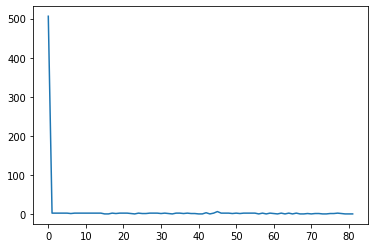

In [29]:
comp_sizes = [len(s) for s in S]
print("投資家コンポーネント上位10件のサイズ")
print(np.sort(comp_sizes)[::-1][:10])
plt.plot(comp_sizes)

投資家の大きな集団が存在する。

In [30]:
print("ネットワーク密度: {0:.2%}".format(nx.density(S[0])))

ネットワーク密度: 0.85%


ネットワーク密度は1%に満たない。

# 基本情報の出力
国ごとのバリュエーション、Industryごとのバリュエーションを出力

In [32]:
def trans2float(x):
    y = x[1:]
    return float(y)

df["Valuation($B) flaot"] = df["Valuation($B)"].apply(trans2float)

In [33]:
df["Valuation($B) flaot"].describe()

count    501.000000
mean       3.185749
std        7.676841
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max      140.000000
Name: Valuation($B) flaot, dtype: float64

In [121]:
df.sort_values(by=["Date Joined"])

Company Valuation($B) Date Joined        Country  \
255  LinkSure Network           $1     1/1/2015          China   
242          Kuaishou          $18     1/1/2015          China   
244      L&P Cosmetic        $1.19     1/1/2016    South Korea   
418         Traveloka           $3     1/1/2017      Indonesia   
24           AppLovin           $2     1/1/2017  United States   
..                ...           ...         ...            ...   
275           Mia.com           $1     9/8/2015          China   
302           OfferUp        $1.20     9/8/2016  United States   
280            Mollie           $1     9/8/2020    Netherlands   
460       WEMAKEPRICE        $2.34     9/9/2015    South Korea   
337       QuintoAndar           $1     9/9/2019         Brazil   

                            Industry  \
255      Mobile & telecommunications   
242      Mobile & telecommunications   
244                Consumer & retail   
418                           Travel   
24       Mobile & telecommunications   
..                               ...   
275  E-commerce & direct-to-consumer   
302      Mobile & telecommunications   
280                          Fintech   
460  E-commerce & direct-to-consumer   
337  E-commerce & direct-to-consumer   

                                      Select Investors  Valuation($B) flaot  
255                                              [N/A]                 1.00  
242  [Morningside Venture Capital,  Sequoia Capital...                18.00  
244                                     [CDIB Capital]                 1.19  
418  [Global Founders Capital,  East Ventures,  Exp...                 3.00  
24   [Orient Hontai Capital,  Webb Investment Network]                 2.00  
..                                                 ...                  ...  
275   [Sequoia Capital China,  ZhenFund,  K2 Ventures]                 1.00  
302  [Andreessen Horowitz,  GGV Capital,  T. Rowe P...                 1.20  
280                    [Technology Crossover Ventures]                 1.00  
460                             [IMM Investment,  NXC]                 2.34  
337  [Kaszek Ventures,  General Atlantic,  SoftBank...                 1.00  

[501 rows x 7 columns]

In [100]:
stat_ind = ["mean", "sum", "min", "max", "count"]

In [120]:
country_group = df.groupby("Country").agg(stat_ind)
country_group.head()
cg_df = pd.DataFrame(country_group["Valuation($B) flaot"][stat_ind].values, columns=stat_ind, index=country_group.index)
cg_df.sort_values(by=["sum"], ascending=False, inplace=True)
cg_df.head()

mean     sum  min     max  count
Country                                             
United States   2.954321  717.90  1.0   46.00  243.0
China           4.379661  516.80  1.0  140.00  118.0
India           3.510400   87.76  1.0   16.00   25.0
United Kingdom  2.728750   65.49  1.0   11.08   24.0
South Korea     2.761818   30.38  1.0    9.00   11.0

In [119]:
industry_group = df.groupby("Industry").agg(stat_ind)
industry_group.head()
ig_df = pd.DataFrame(industry_group["Valuation($B) flaot"][stat_ind].values, columns=stat_ind, index=industry_group.index)
ig_df.sort_values(by=["sum"], ascending=False, inplace=True)
ig_df.head()

mean     sum  min    max  count
Industry                                                            
Fintech                          3.513099  249.43  1.0   36.0   71.0
Artificial intelligence          5.386444  242.39  1.0  140.0   45.0
E-commerce & direct-to-consumer  2.683594  171.75  1.0   15.0   64.0
Auto & transportation            4.915357  137.63  1.0   62.0   28.0
Internet software & services     2.047656  131.05  1.0    6.0   64.0

In [70]:
y = cg_df["value"].values
x = cg_df.index.to_numpy()

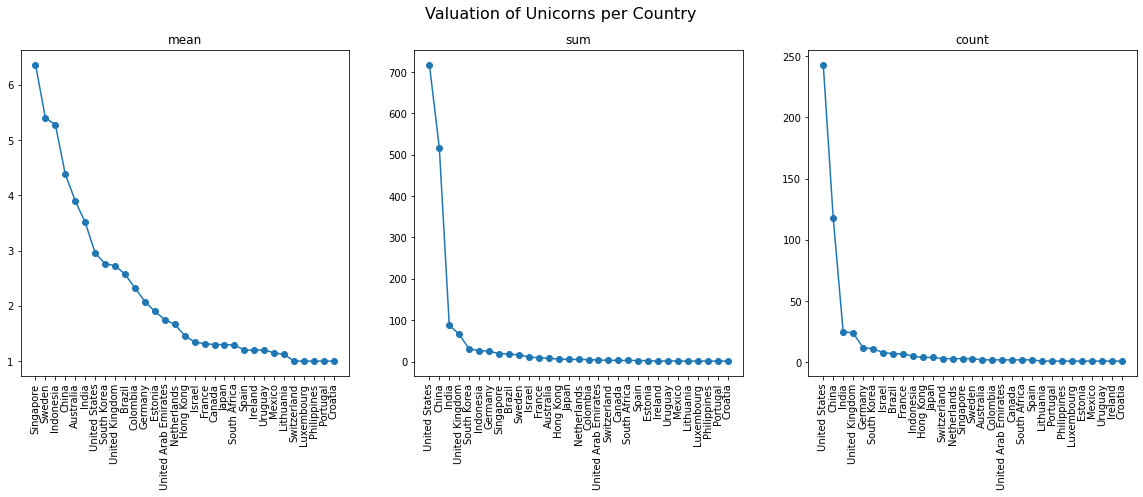

Complete output to ../out/value_per_country.png


In [117]:
nrows = 1
ncols = 3
fig = plt.figure(figsize=(20, 6))
fig.suptitle("Valuation of Unicorns per Country", fontsize=16)
for ind, col in enumerate(["mean", "sum", "count"]):
    ax = fig.add_subplot(nrows, ncols, ind+1)
    cg_df.sort_values(by=[col], ascending=False, inplace=True)
    y = cg_df[col].values
    x = cg_df.index.to_numpy()
    ax.plot(x, y, marker="o")
    ax.set_title(f"{col}")
    plt.xticks(rotation=90)
plt.show()
fpath = os.path.join("..", "out", "value_per_country.png")
fig.savefig(fpath)
print("Complete output to {}".format(fpath))

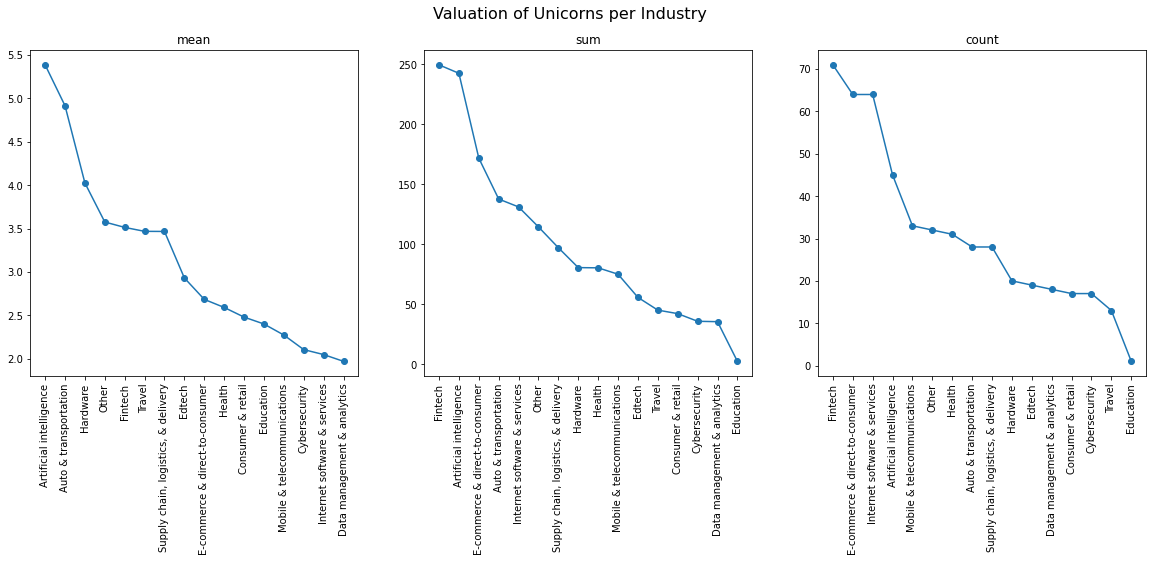

Complete output to ../out/value_per_industry.png


In [118]:
nrows = 1
ncols = 3
fig = plt.figure(figsize=(20, 6))
fig.suptitle("Valuation of Unicorns per Industry", fontsize=16)
for ind, col in enumerate(["mean", "sum", "count"]):
    ax = fig.add_subplot(nrows, ncols, ind+1)
    ig_df.sort_values(by=[col], ascending=False, inplace=True)
    y = ig_df[col].values
    x = ig_df.index.to_numpy()
    ax.plot(x, y, marker="o")
    ax.set_title(f"{col}")
    plt.xticks(rotation=90)
plt.show()
fpath = os.path.join("..", "out", "value_per_industry.png")
fig.savefig(fpath)
print("Complete output to {}".format(fpath))

# ネットワークに時系列の要素を追加
カンパニーグラフは知識の流れを表していると解釈することができる。Date Joinedが遅い企業は、早い企業から知識を共有されていると考える。
そうした場合にどこの企業からどこの企業にVCを介して知識が伝播しているかを可視化する。

In [123]:
company_graph_pd

source            target
0        Knotel          Flexport
1        Knotel              Gong
2        Knotel         VAST Data
3        Knotel              Dave
4        Knotel             Udemy
...         ...               ...
3605       Omio             Glovo
3606       Just  Impossible Foods
3607      Figma          Rippling
3608  Yuanfudao          Zhaogang
3609      Klook          Zhaogang

[3610 rows x 2 columns]

In [133]:
import datetime
uc_date = df[["Company", "Date Joined"]].values
date_dict = {
    k: datetime.datetime.strptime(v, "%m/%d/%Y") for k, v in uc_date
}
date_dict

{'100credit': datetime.datetime(2018, 4, 18, 0, 0),
 '17zuoye': datetime.datetime(2018, 3, 7, 0, 0),
 '23andMe': datetime.datetime(2015, 7, 3, 0, 0),
 '4Paradigm': datetime.datetime(2018, 12, 19, 0, 0),
 '58 Daojia': datetime.datetime(2015, 10, 12, 0, 0),
 'About You': datetime.datetime(2018, 7, 19, 0, 0),
 'Acronis': datetime.datetime(2019, 9, 18, 0, 0),
 'Actifio': datetime.datetime(2014, 3, 24, 0, 0),
 'ACV Auctions': datetime.datetime(2019, 11, 12, 0, 0),
 'Affirm': datetime.datetime(2017, 12, 11, 0, 0),
 'Afiniti': datetime.datetime(2017, 4, 14, 0, 0),
 'Age of Learning': datetime.datetime(2016, 5, 3, 0, 0),
 'Aihuishou': datetime.datetime(2018, 7, 12, 0, 0),
 'Airbnb': datetime.datetime(2011, 7, 26, 0, 0),
 'Airtable': datetime.datetime(2018, 11, 15, 0, 0),
 'Airwallex': datetime.datetime(2019, 3, 25, 0, 0),
 'AIWAYS': datetime.datetime(2018, 4, 16, 0, 0),
 'Allbirds': datetime.datetime(2018, 10, 11, 0, 0),
 'Alto Pharmacy': datetime.datetime(2020, 1, 30, 0, 0),
 'Amplitude': dat

In [136]:
sources = []
targets = []
for source, target in company_graph_pd.values:
        if date_dict[source] > date_dict[target]:
            sources.append(target)
            targets.append(source)
        else:
            sources.append(source)
            targets.append(target)
comp_dgraph_df = pd.DataFrame({
    "source": sources,
    "target": targets
})
comp_dgraph_df

source            target
0      Flexport            Knotel
1        Knotel              Gong
2        Knotel         VAST Data
3        Knotel              Dave
4        Knotel             Udemy
...         ...               ...
3605       Omio             Glovo
3606       Just  Impossible Foods
3607      Figma          Rippling
3608  Yuanfudao          Zhaogang
3609   Zhaogang             Klook

[3610 rows x 2 columns]

In [139]:
# チェック用
print(date_dict["Flexport"])
print(date_dict["Knotel"])
print(date_dict["Gong"])
print(date_dict["VAST Data"])
print(date_dict["Dave"])
print(date_dict["Udemy"])

2018-04-30 00:00:00
2019-08-21 00:00:00
2020-08-12 00:00:00
2020-04-16 00:00:00
2019-09-30 00:00:00
2020-02-19 00:00:00


In [141]:
comp_dgraph = nx.from_pandas_edgelist(comp_dgraph_df, source="source", target="target", create_using=nx.DiGraph)

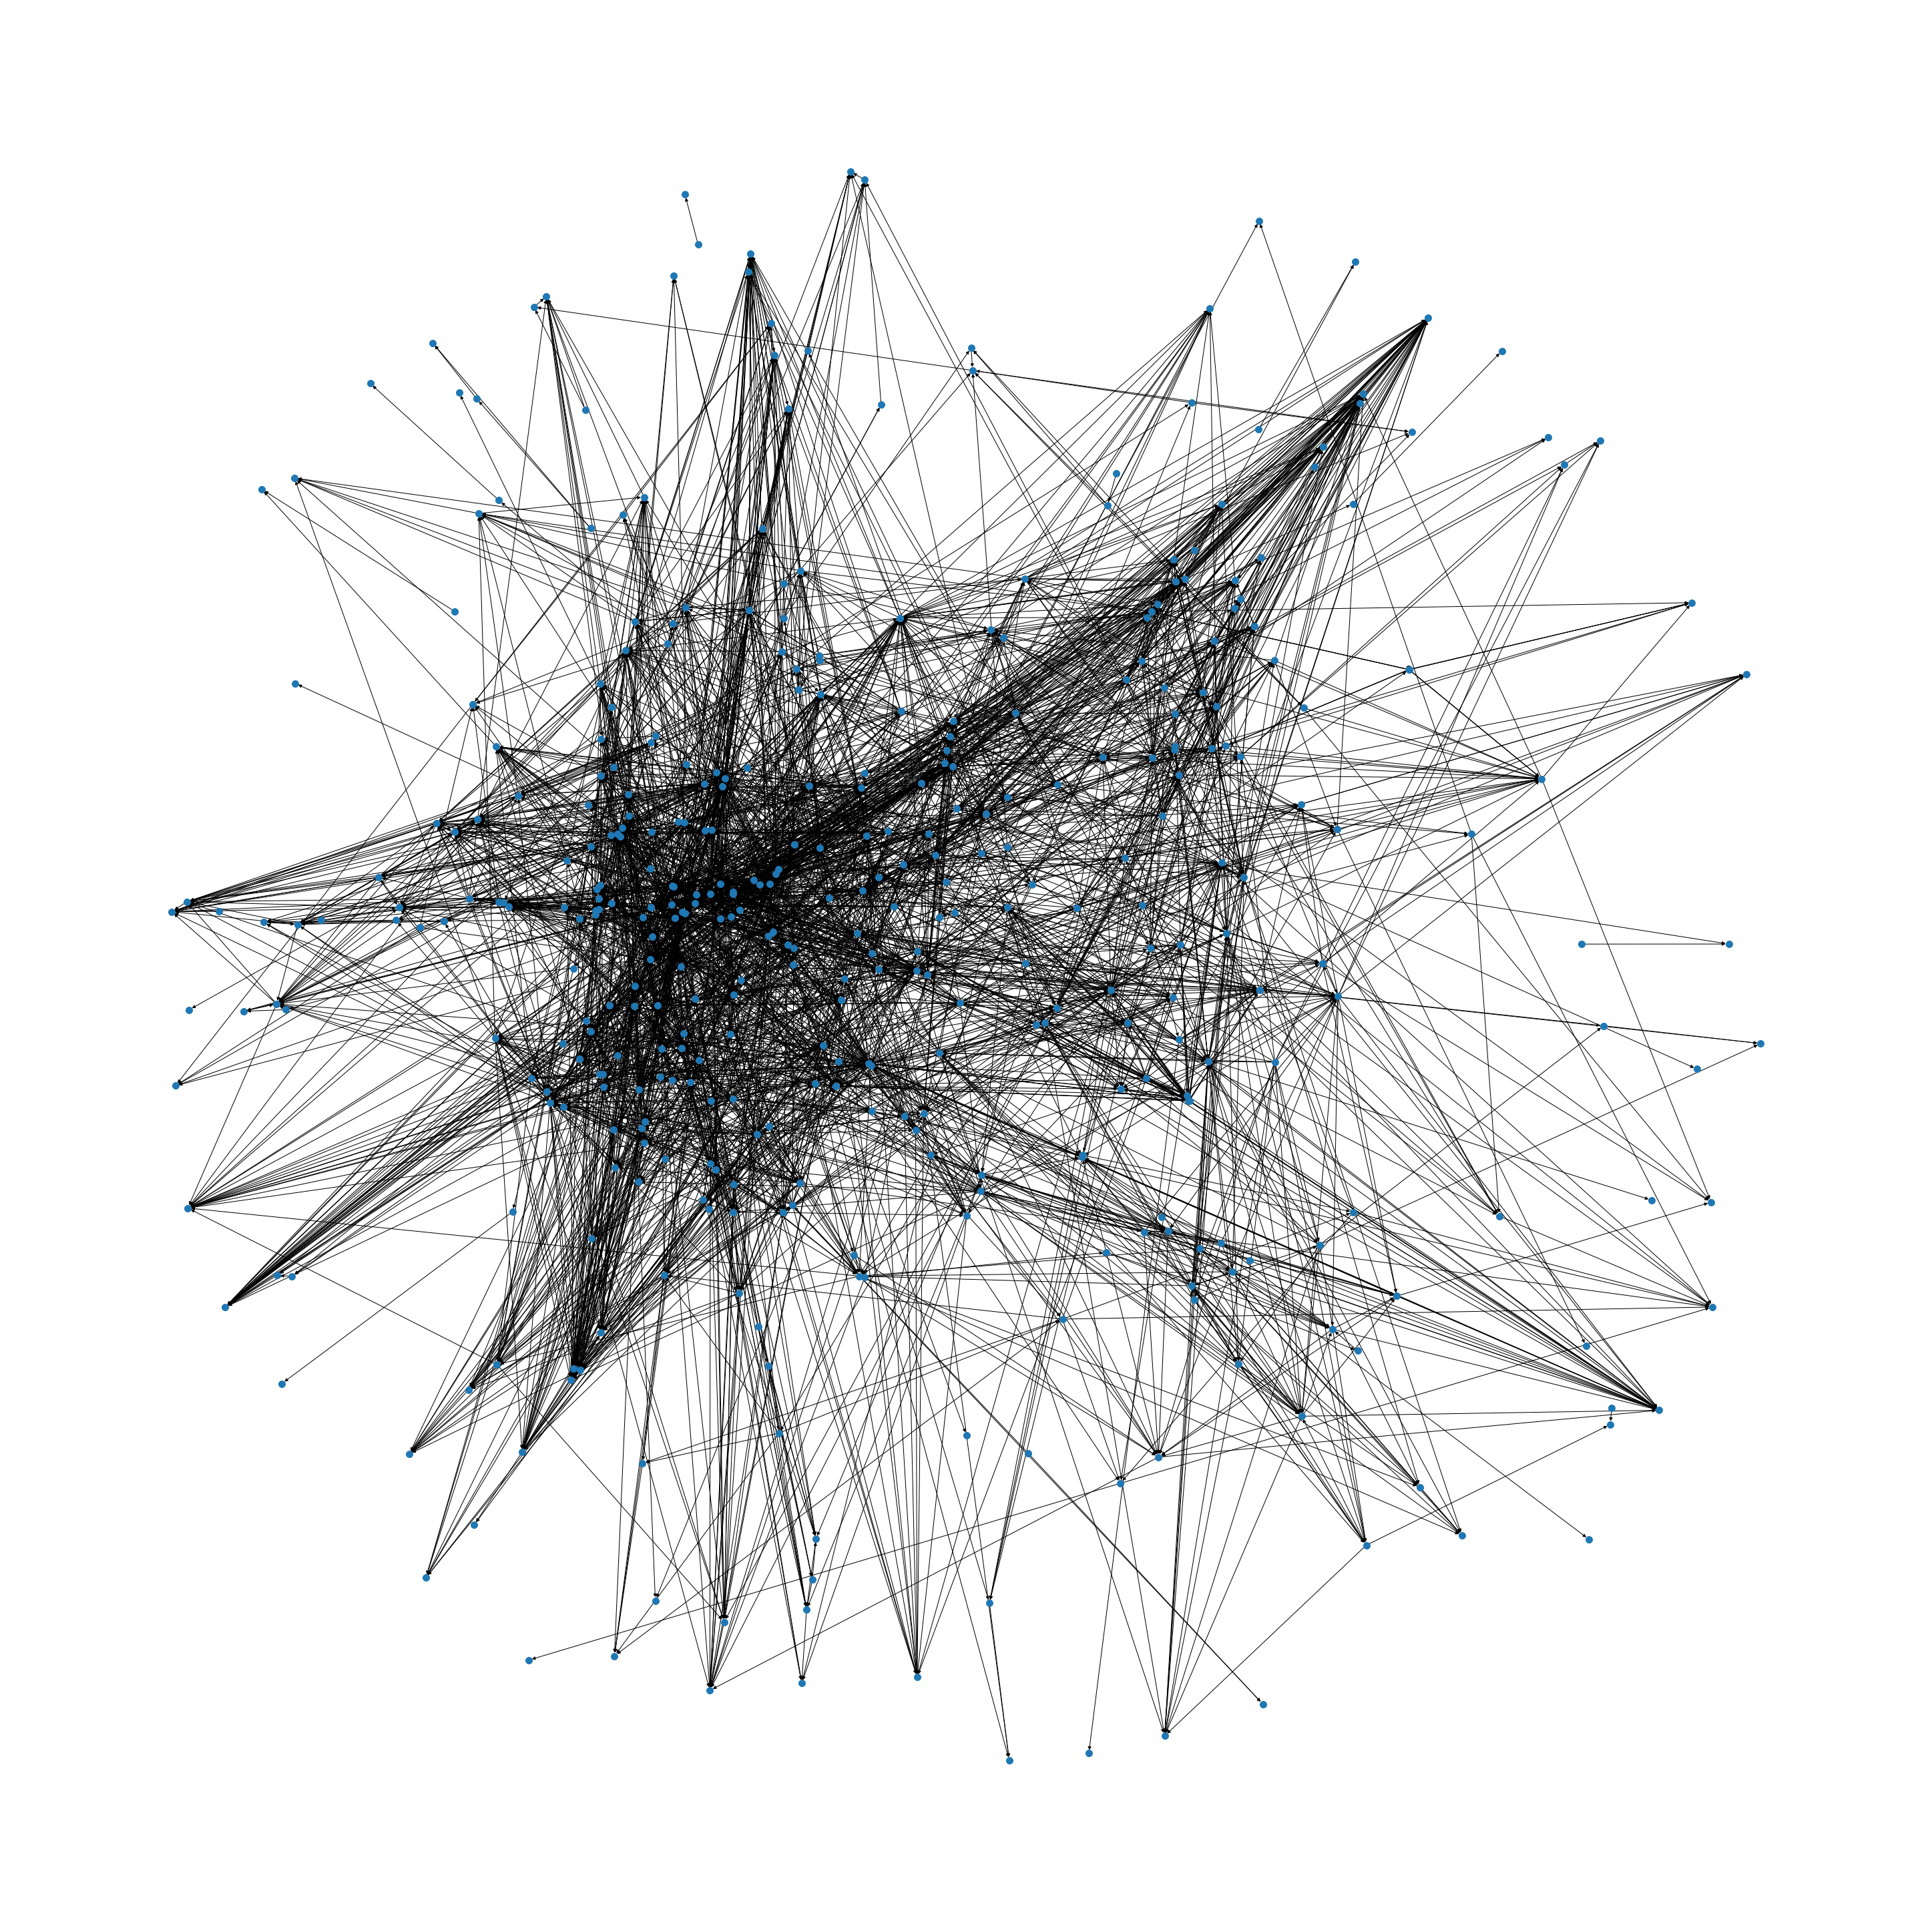

In [145]:
# TODO ノードの配置を変更する。Valuationでノードのサイズを変更する。
plt.figure(figsize=(40, 40))
nx.draw(comp_dgraph, font_size=8, node_size=100)
plt.savefig(os.path.join("..", "out", "sen2jun_dgraph"))

# データの出力

In [38]:
investor_centrality_df.to_csv(os.path.join("..", "out", "investor_centrality.csv"))
company_centrality_df.to_csv(os.path.join("..", "out", "company_centrality.csv"))

In [39]:
pd.DataFrame(S[1].nodes).to_csv(os.path.join("..", "out", "largest_investor_component.csv"), index=False, header=False)